In [4]:
import sys

if 'google.colab' in sys.modules:
    !pip install "natural-pdf[all]"
else:
    print("Not in Colab")

Not in Colab


In [1]:
from natural_pdf import PDF

## Opening a PDF

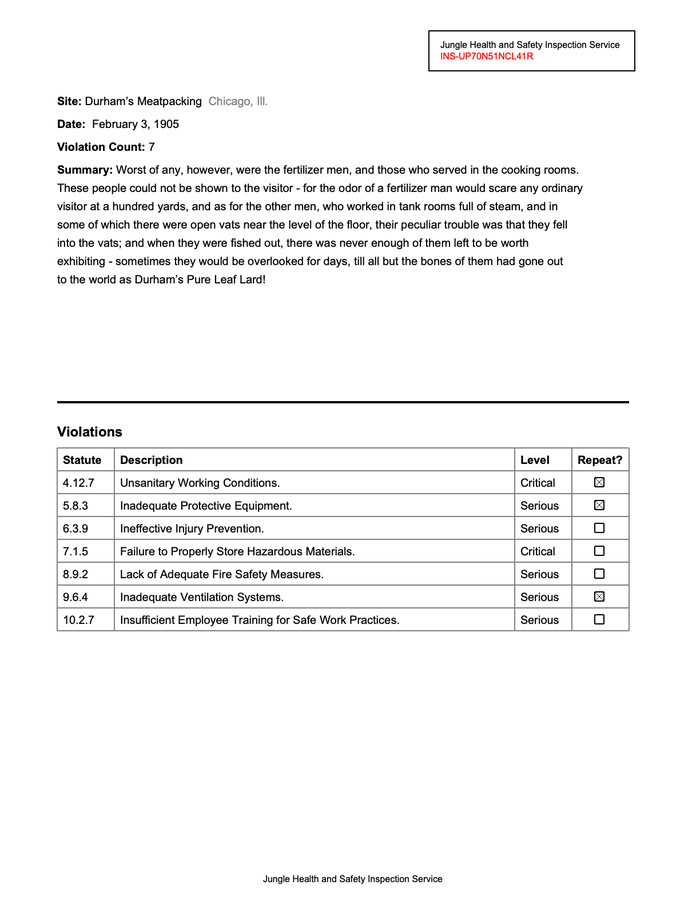

In [2]:
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]
page.to_image(width=700)

## Finding elements

In [3]:
red_text = page.find('text[color~=red]')
red_text

<TextElement text='INS-UP70N5...' font='Helvetica' size=8.0 bbox=(385.0, 45.65599999999995, 466.35200000000003, 53.65599999999995)>

In [4]:
red_text.text

'INS-UP70N51NCL41R'

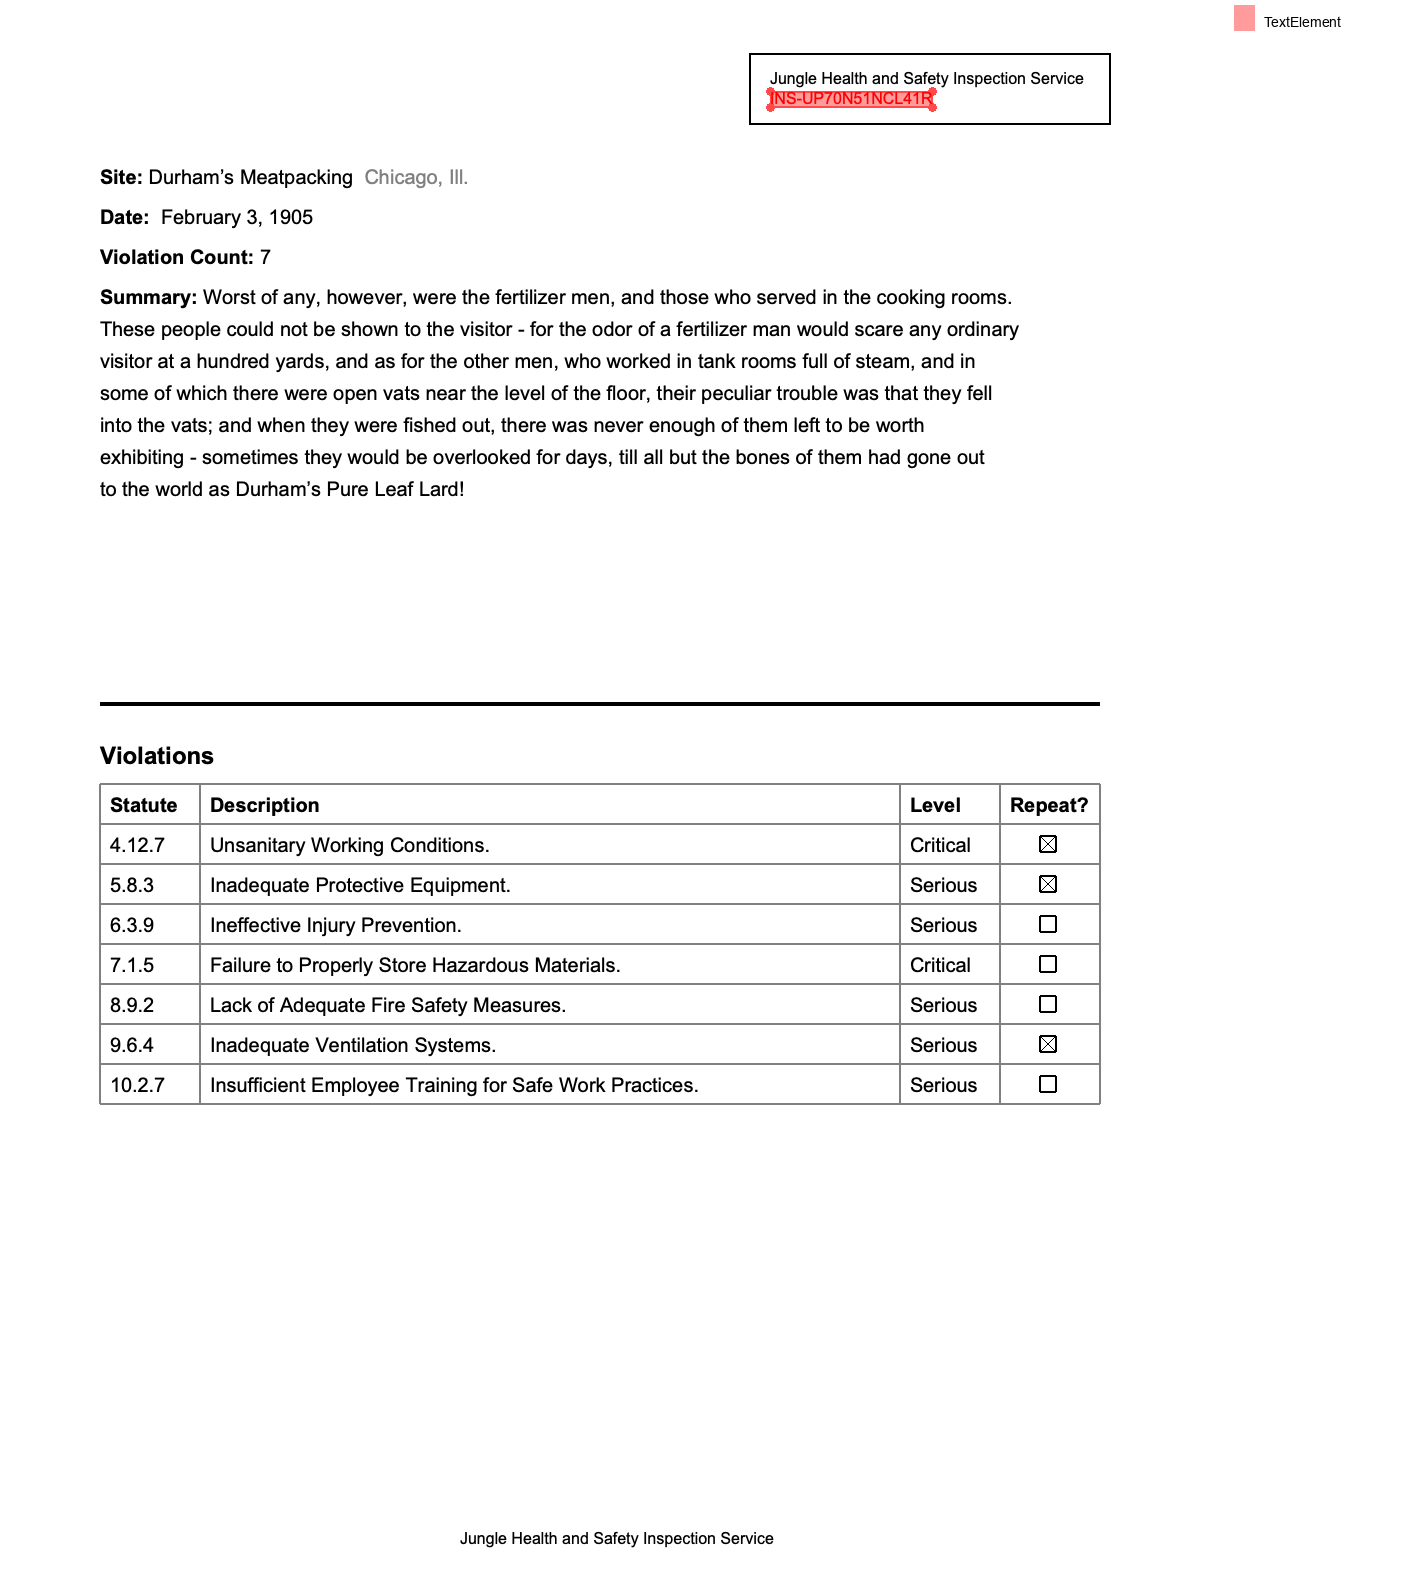

In [5]:
red_text.show()

## Spatial navigation

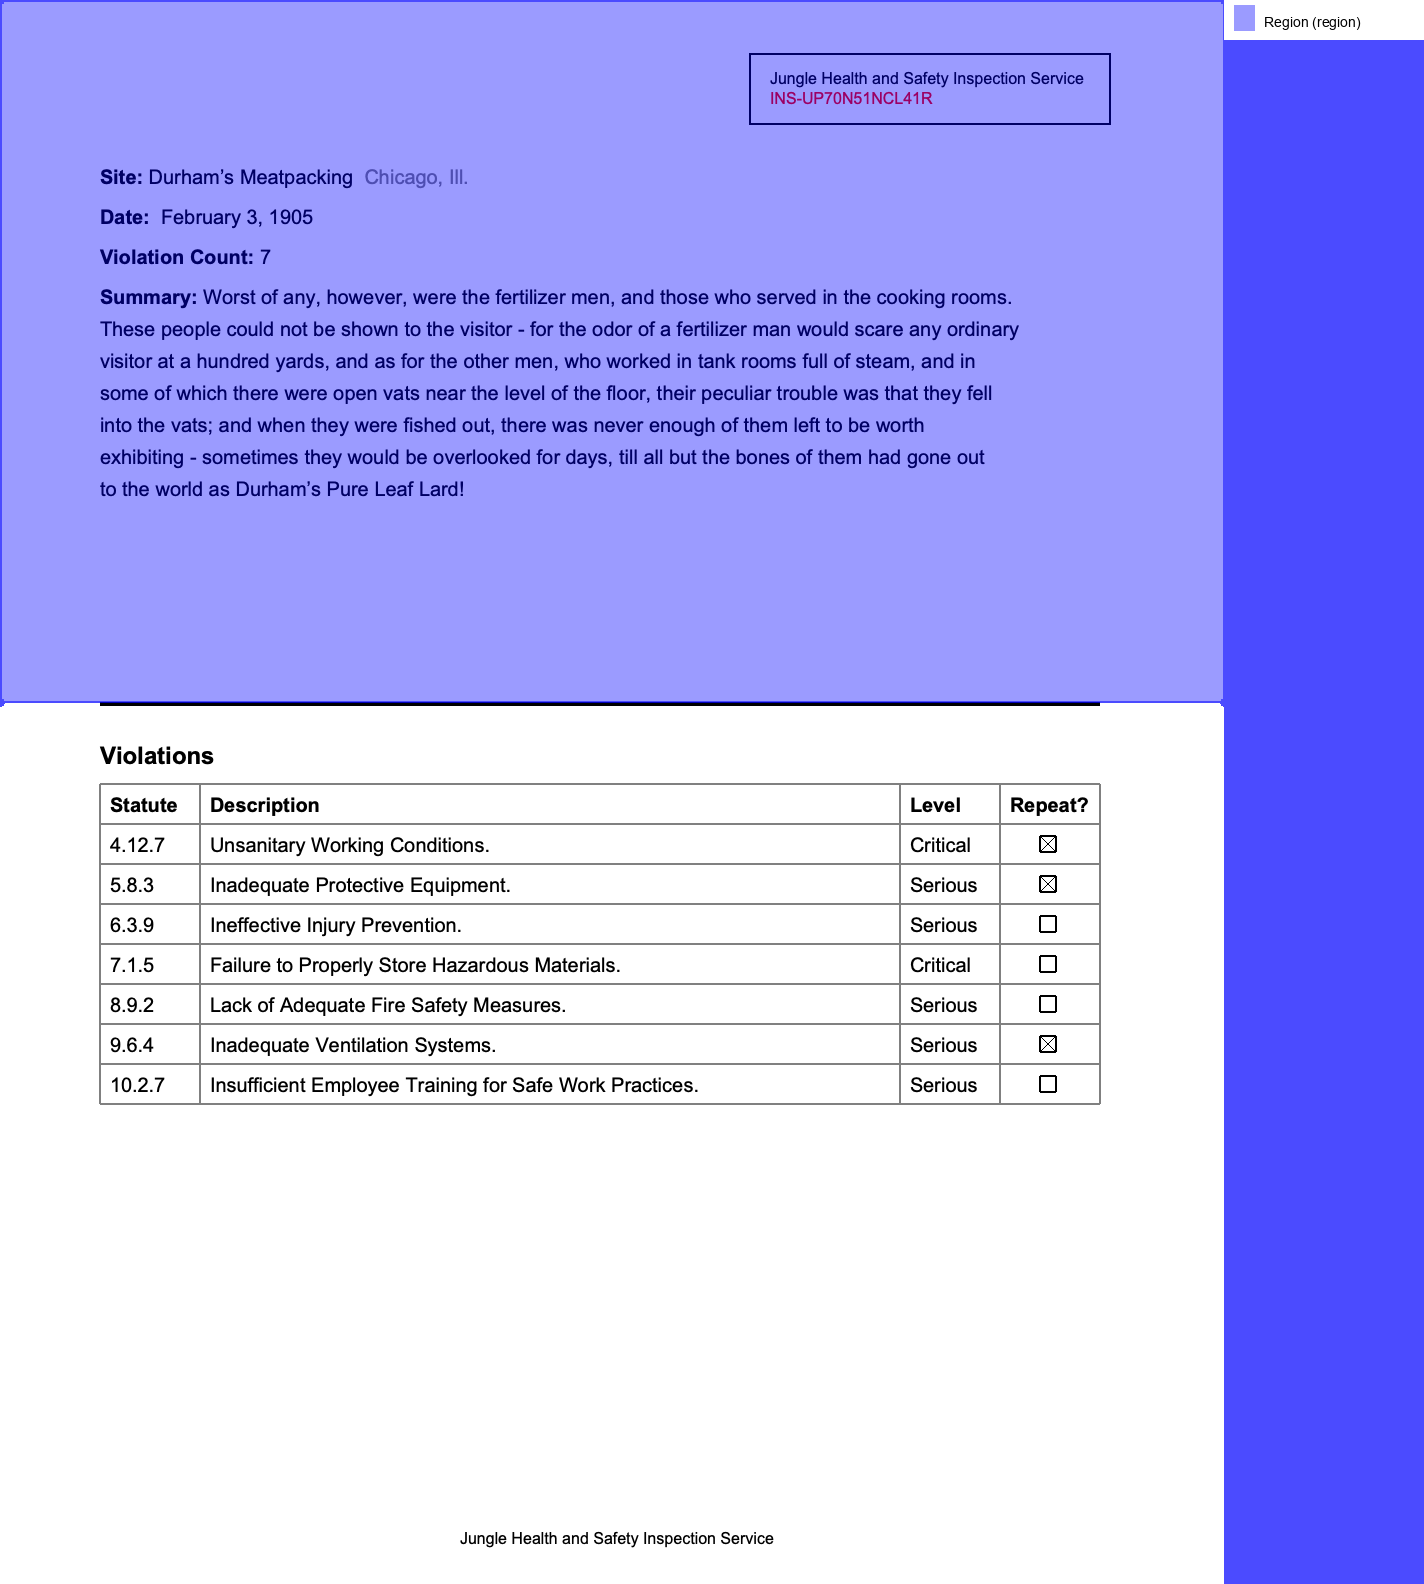

In [7]:
(
    page
        .find('line[width=2]')
        .above()
        .show()
)

In [8]:
print(
    page
        .find('line[width=2]')
        .above()
        .extract_text(layout=True)
        .rstrip()
)

Jungle Health and Safety Inspection Service INS-UP70N51NCL41R Site:  Durham’s Meatpacking Chicago, Ill. Date:  February 3, 1905 Violation Count:  7 Summary:  Worst of any, however, were the fertilizer men, and those who served in the cooking rooms. These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary  visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in  some of which there were open vats near the level of the floor, their peculiar trouble was that they fell into the vats; and when they were fished out, there was never enough of them left to be worth  exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out to the world as Durham’s Pure Leaf Lard!


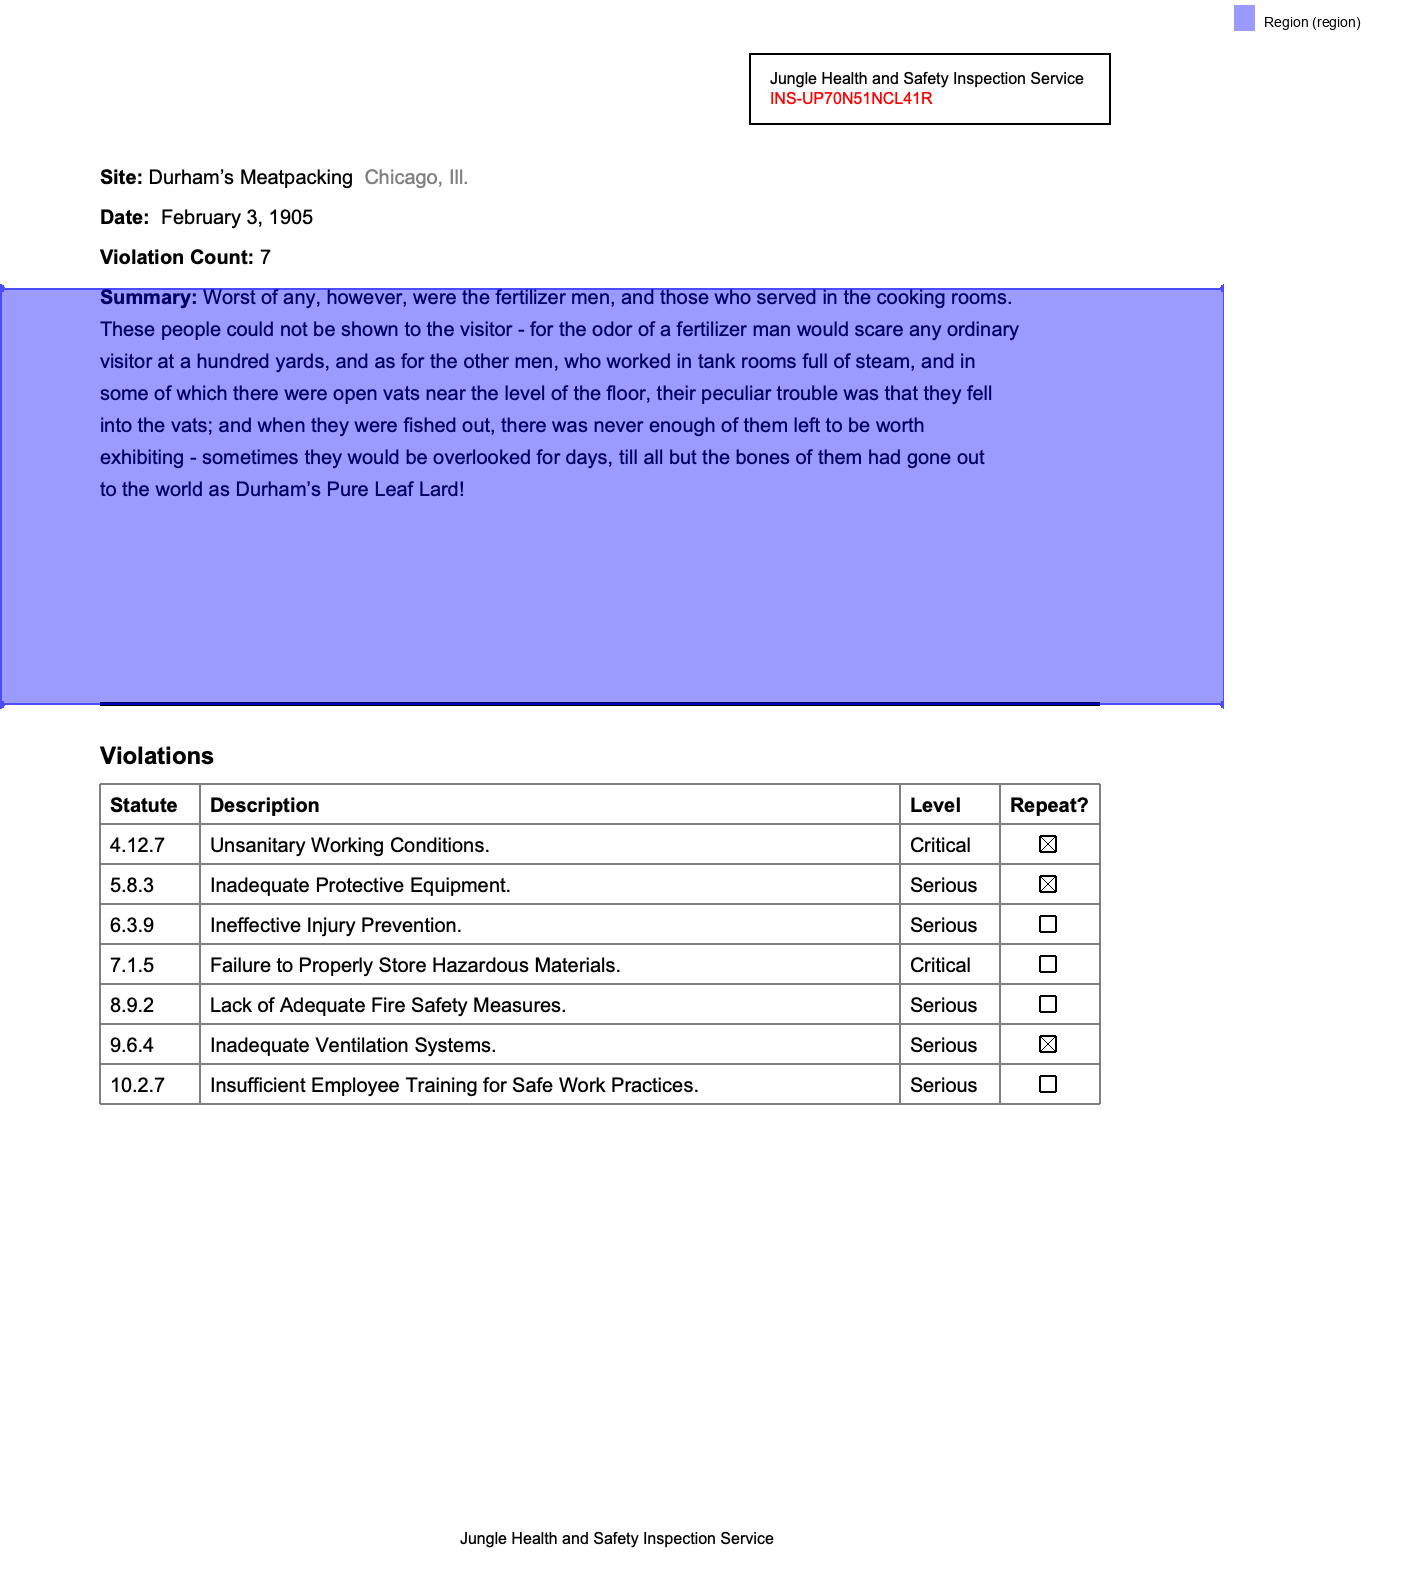

In [9]:
(
    page
    .find('text:contains("Summary")')
    .below(
        include_source=True, 
        until="line[width>=2]"
    )
    .show()
)

In [10]:
print(
    page
        .find('text:contains("Summary")')
        .below(
            include_source=True, 
            until="line[width>=2]"
        )
        .extract_text()
)

Summary:  Worst of any, however, were the fertilizer men, and those who served in the cooking rooms. These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary  visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in  some of which there were open vats near the level of the floor, their peculiar trouble was that they fell into the vats; and when they were fished out, there was never enough of them left to be worth  exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out to the world as Durham’s Pure Leaf Lard!


## Visual debugging

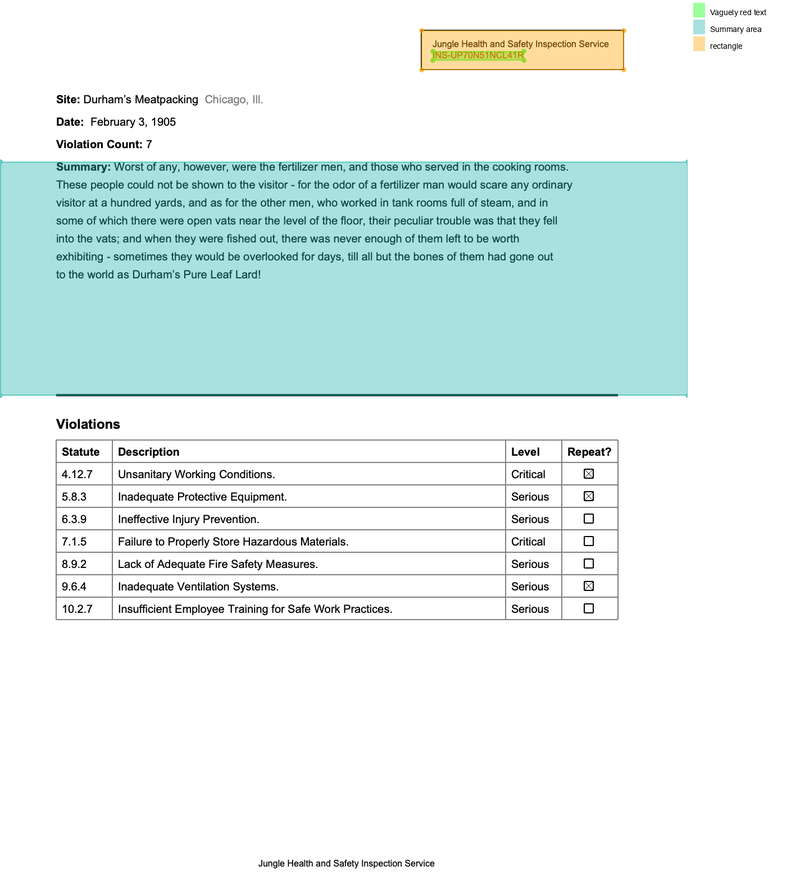

In [12]:
page.clear_highlights()

red_text = page.find("text[color~=red]").highlight(label="Vaguely red text")
summary = (
    page.find('text:contains("Summary")')
    .below(include_source=True, until="line[width>=2]")
    .highlight(label="Summary area")
)
box = page.find("rect").highlight(label="rectangle")

page.to_image(width=800)

In [13]:
red_text.extract_text()

'INS-UP70N51NCL41R'

In [14]:
box.extract_text()

'Jungle Health and Safety Inspection Service INS-UP70N51NCL41R'

In [15]:
summary.extract_text()

'Summary:  Worst of any, however, were the fertilizer men, and those who served in the cooking rooms. These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary  visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in  some of which there were open vats near the level of the floor, their peculiar trouble was that they fell into the vats; and when they were fished out, there was never enough of them left to be worth  exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out to the world as Durham’s Pure Leaf Lard!'

# Fonts and text sizes

In [21]:
page.find('text').font_info()

{'text': 'Jungle Health and Safety Inspection Service',
 'fontname': 'Helvetica',
 'font_family': 'Helvetica',
 'font_variant': '',
 'size': 8.0,
 'bold': False,
 'italic': False,
 'color': (0, 0, 0)}

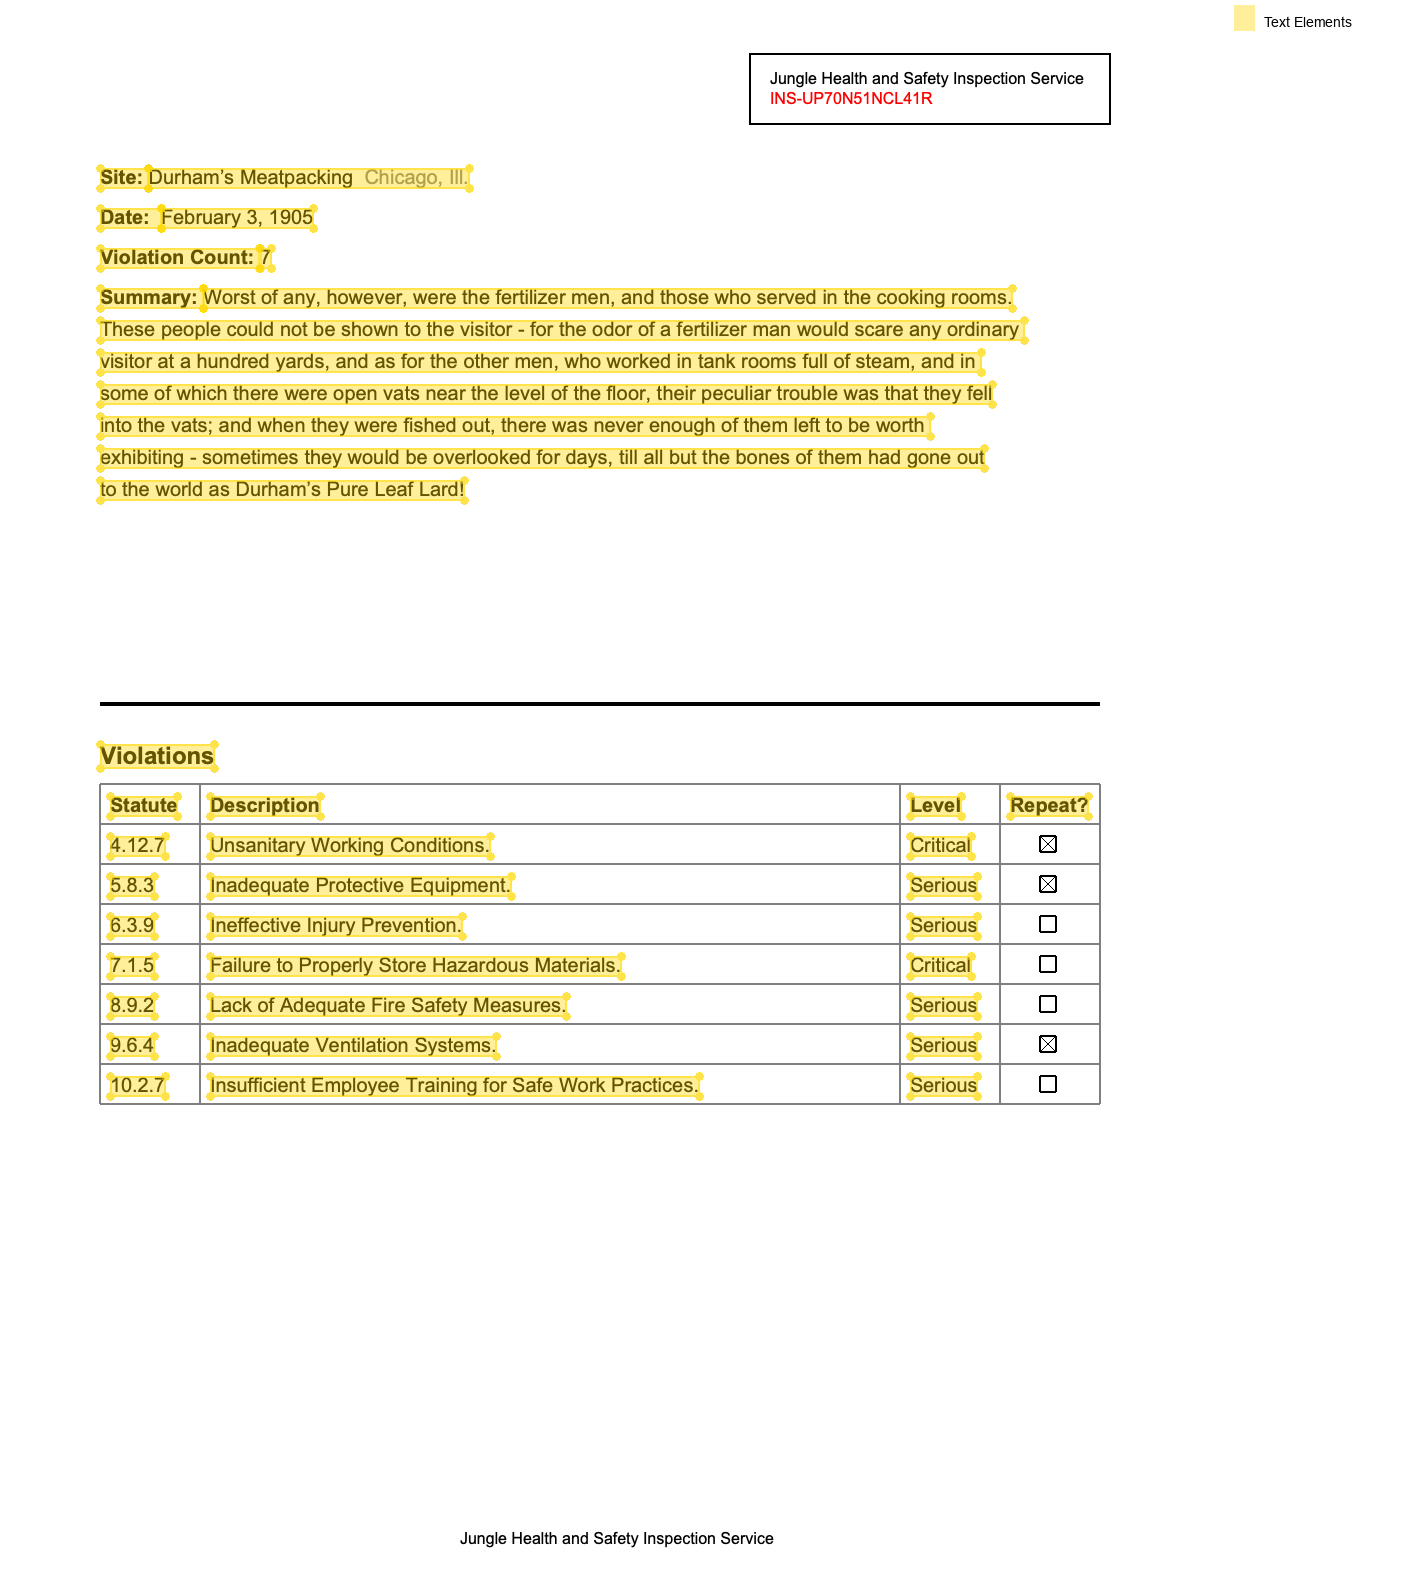

In [32]:
page.find_all('text[font_family=Helvetica][size>=10]').show()

In [33]:
page.find_all('text:bold')[0].font_info()

{'text': 'Site: ',
 'fontname': 'Helvetica-Bold',
 'font_family': 'Helvetica',
 'font_variant': '',
 'size': 10.0,
 'bold': True,
 'italic': False,
 'color': (0, 0, 0)}

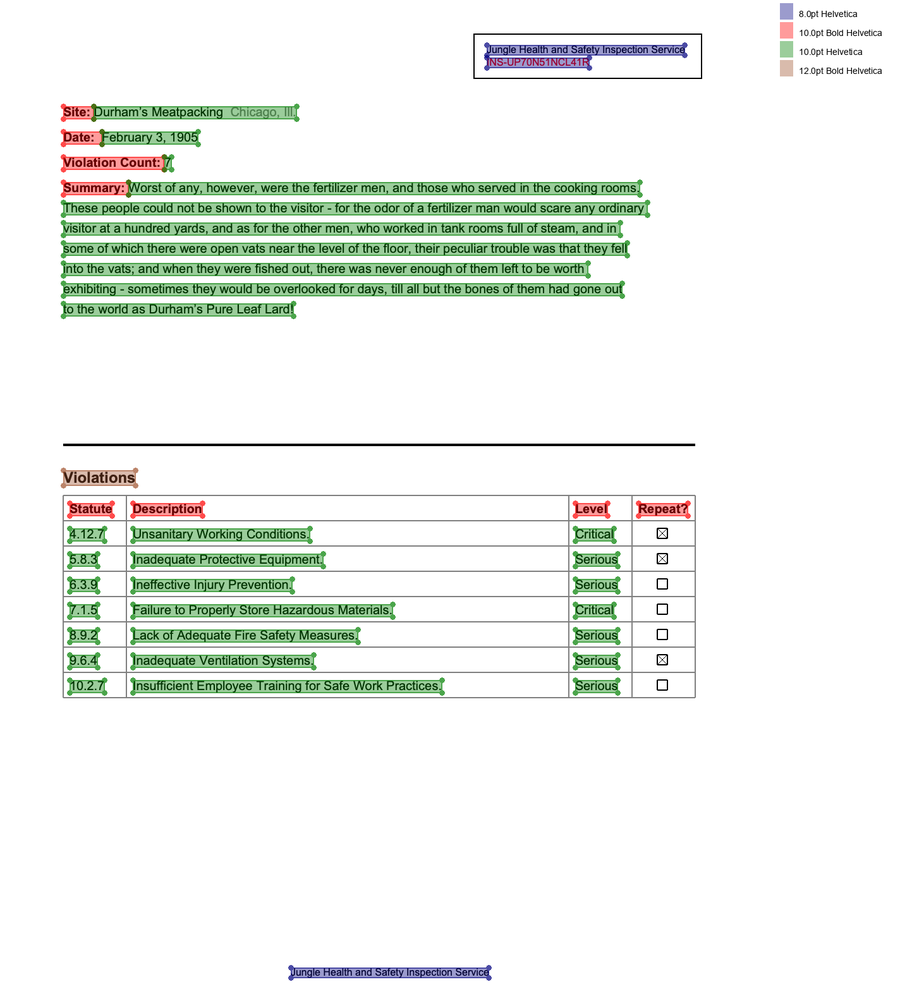

In [34]:
page.clear_highlights()
page.analyze_text_styles()
page.find_all('text').highlight(group_by='style_label')
page.to_image(width=900)

## Layout detection

In [35]:
page.analyze_layout(engine='yolo')


image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpkoj2kpid/temp_layout_image.png: 1024x800 2 titles, 3 plain texts, 2 abandons, 1 table, 1634.7ms
Speed: 6.2ms preprocess, 1634.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 800)


<ElementCollection[Region](count=8)>

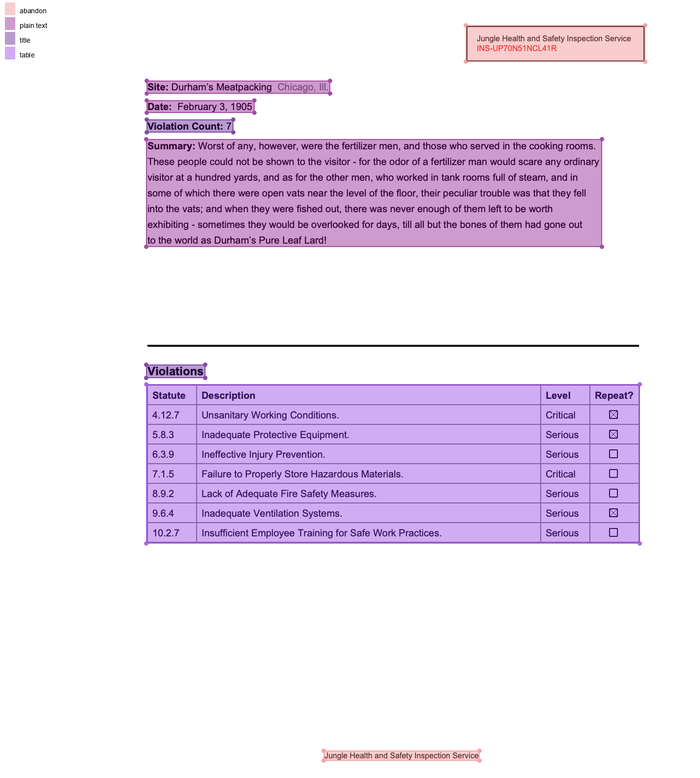

In [36]:
page.clear_highlights()
page.find_all('region').highlight(group_by='type')
page.to_image(width=700, legend_position='left')

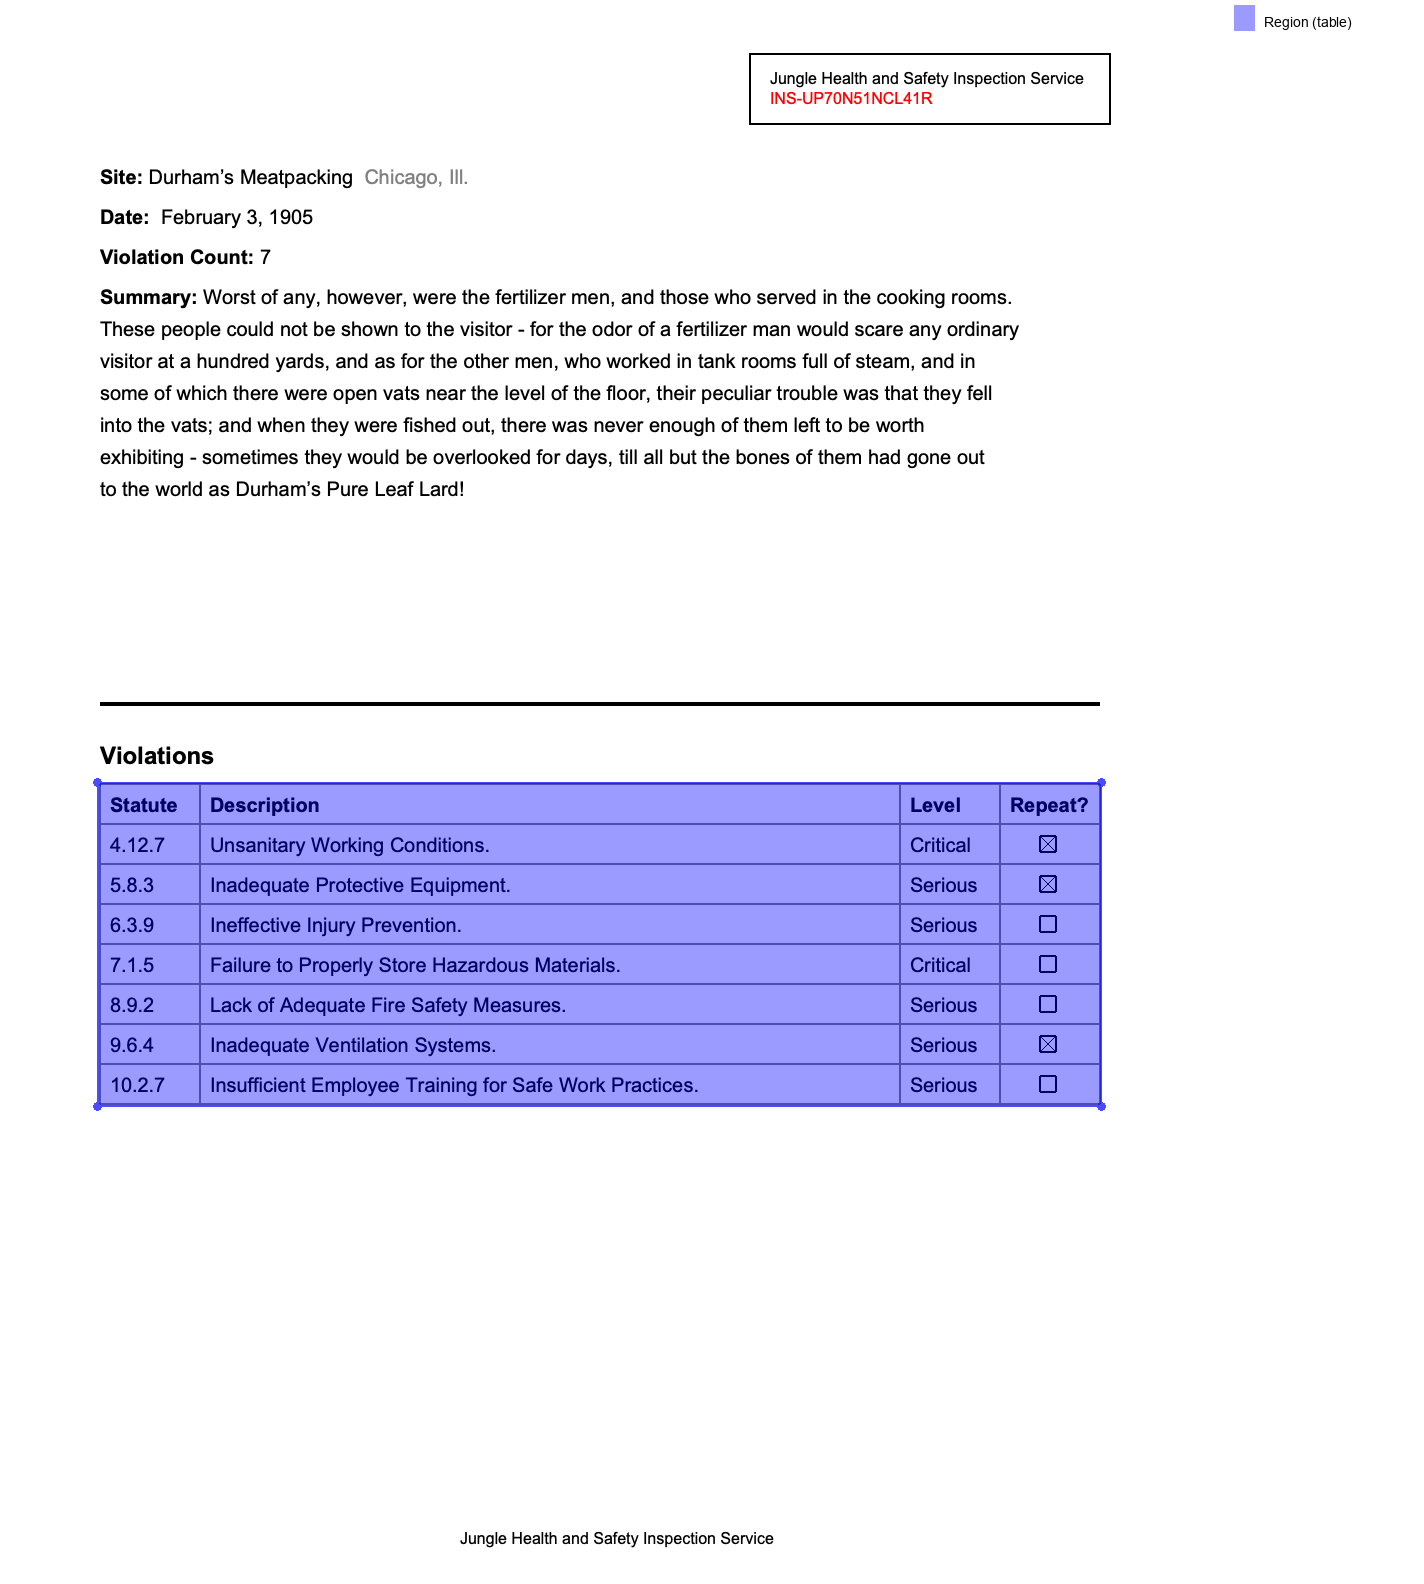

In [38]:
page.clear_highlights()
page.find("region[type='table']").show()

In [39]:
print(page.find("region[type='table']").extract_text(layout=True))

Statute Description Level Repeat? 4.12.7 Unsanitary Working Conditions. Critical 5.8.3 Inadequate Protective Equipment. Serious 6.3.9 Ineffective Injury Prevention. Serious 7.1.5 Failure to Properly Store Hazardous Materials. Critical 8.9.2 Lack of Adequate Fire Safety Measures. Serious 9.6.4 Inadequate Ventilation Systems. Serious 10.2.7 Insufficient Employee Training for Safe Work Practices. Serious


In [30]:
page.find("region[type='table']").extract_table()

[['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

## More table work

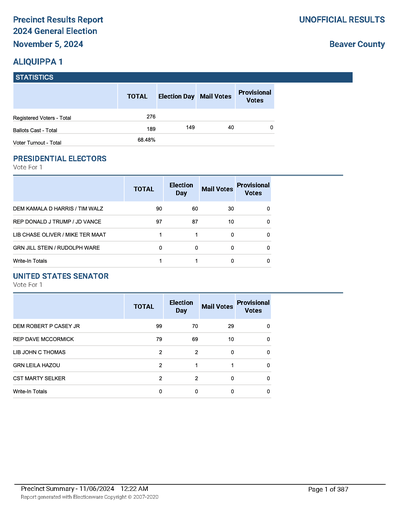

In [40]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/0500000US42007.pdf")
page = pdf.pages[0]
page.to_image(width=400)

In [41]:
page.analyze_layout(engine='tatr')

<ElementCollection[Region](count=29)>

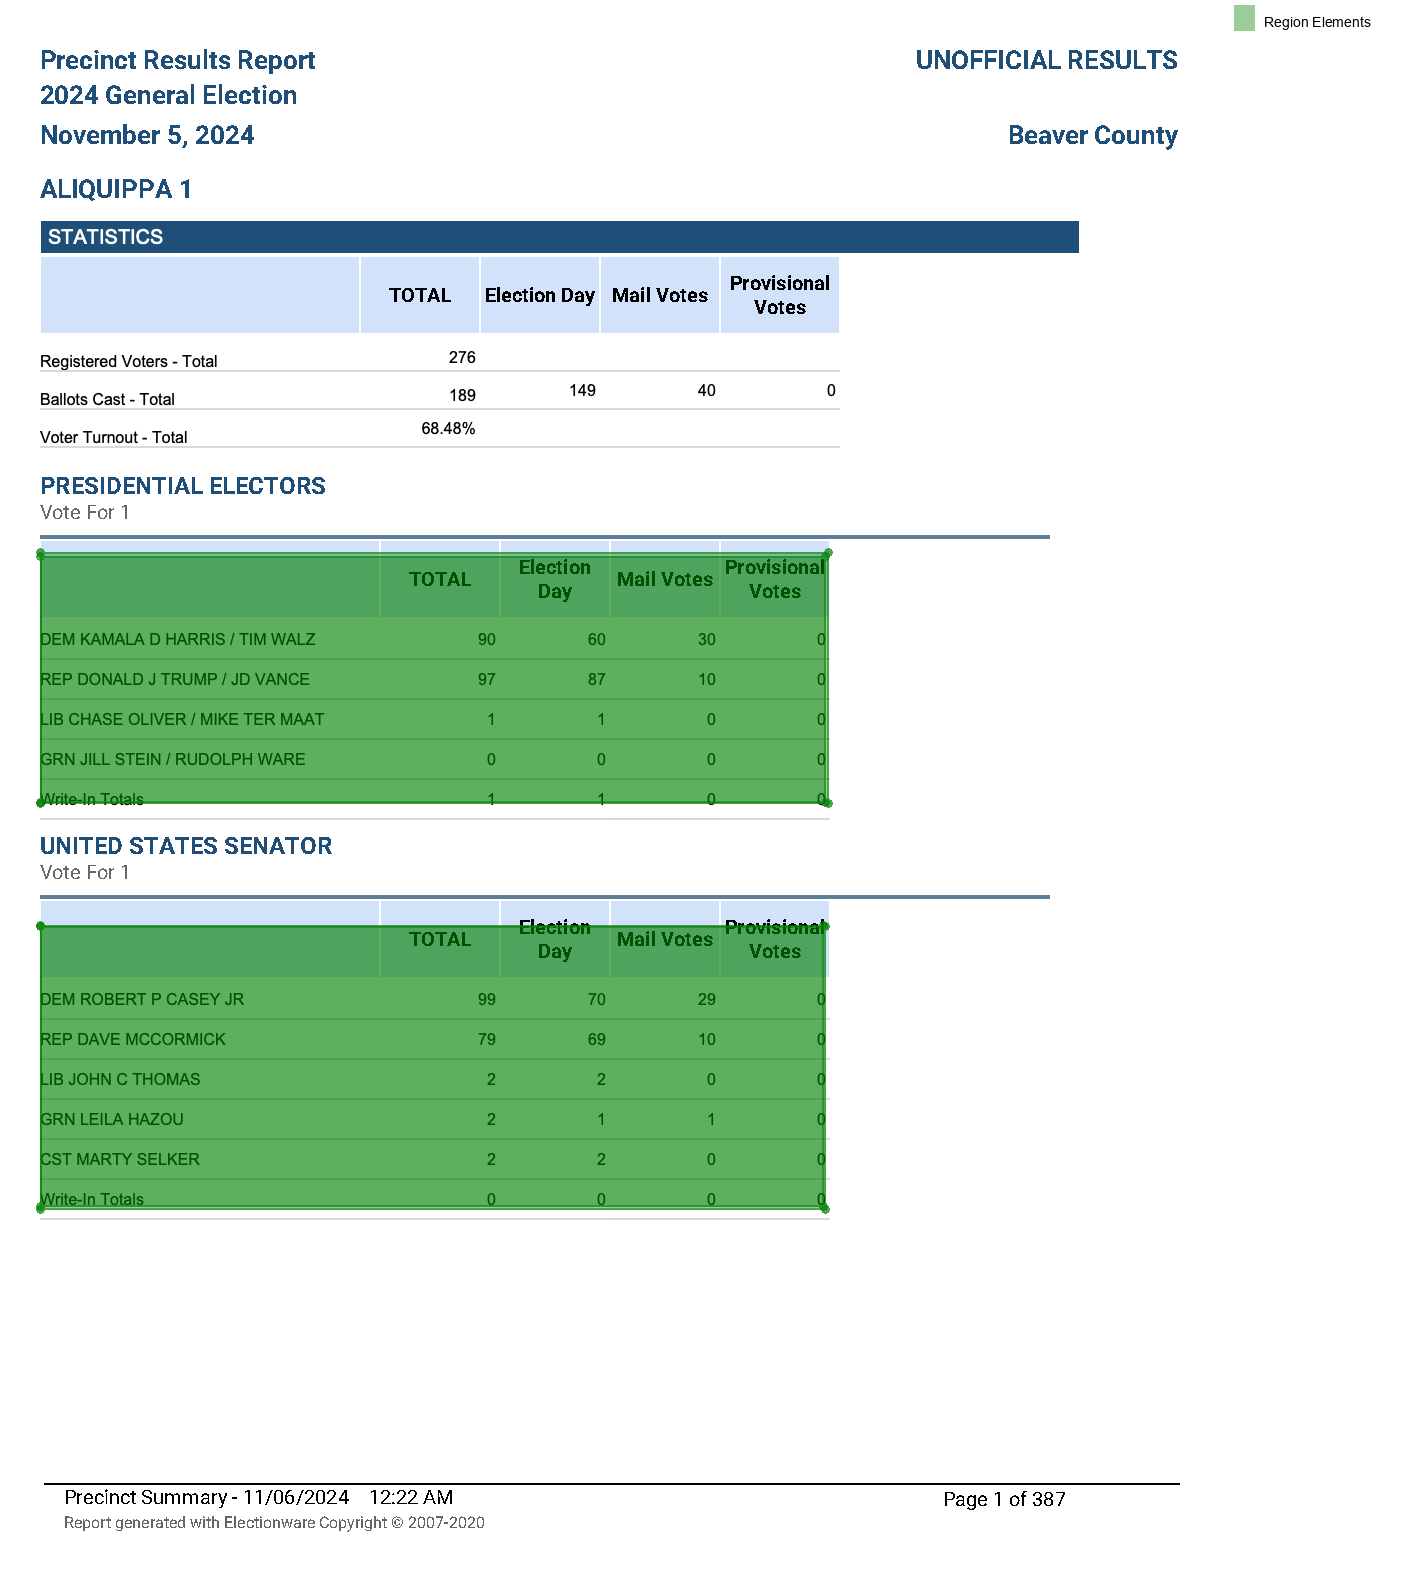

In [42]:
page.find_all("region[type='table']").show()

In [45]:
# TATR detects table rows/columns
page.find("region[type='table']").extract_table()

[['Election Provisional TOTAL Mail Votes Day Votes'],
 ['', 'TOTAL', 'Election Day', 'Mail Votes', 'Provisional Votes'],
 ['DEM KAMALA D HARRIS / TIM WALZ', '90', '60', '30', ''],
 ['REP DONALD J TRUMP / JD VANCE', '97', '87', '10', ''],
 ['LIB CHASE OLIVER / MIKE TER MAAT', '1', '1', '0', ''],
 ['GRN JILL STEIN / RUDOLPH WARE', '0', '0', '0', ''],
 ['', '', '', '', '']]

In [48]:
# This table doesn't work with the pdfplumber default approach
page.find("region[type='table']").extract_table(method='pdfplumber')

[['', None, None, None, None],
 [None, 'TOTAL', 'Election\nDay', 'Mail Votes', 'Provisional\nVotes']]

# Document Q&A

In [51]:
page.ask("What is the date?")

{'answer': 'November 5, 2024',
 'confidence': 0.9988861680030823,
 'start': 3,
 'end': 3,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

In [56]:
page.ask("How many votes did Kamala Harris and Tim Walz get?")

{'answer': '90',
 'confidence': 0.46960777044296265,
 'start': 30,
 'end': 30,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

In [59]:
# It always wants to say SOMETHING
# at least there's a confidence score?
page.ask("How many votes did Natural PDF get?")

{'answer': '2024 General Election',
 'confidence': 0.7346562147140503,
 'start': 2,
 'end': 2,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

# Exclusion zones

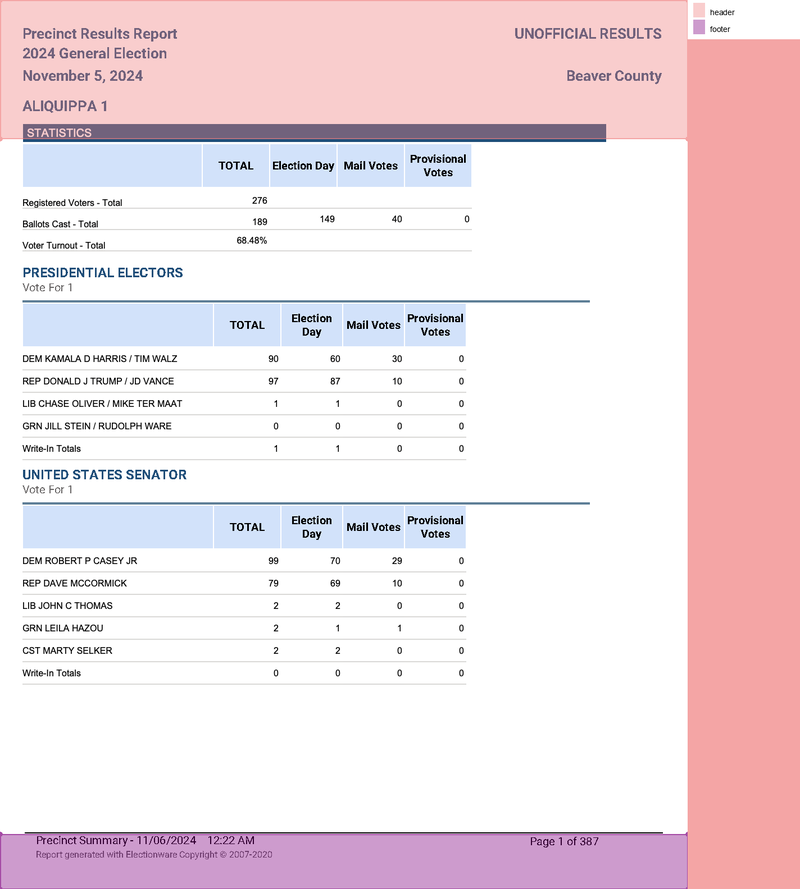

In [60]:
page.clear_highlights()
header = page.find('text:contains("STATISTICS")').above(include_source=True).highlight(label='header')
footer = page.find_all('line')[-1].below().highlight(label='footer')
page.to_image(width=800)

In [66]:
page.add_exclusion(header)
page.add_exclusion(footer)

<Page number=1 index=0>

In [67]:
page.extract_text()[:200]

'Provisional TOTAL Election Day Mail Votes Votes 276 Registered Voters - Total 149 40 0 189 Ballots Cast - Total 68.48% Voter Turnout - Total PRESIDENTIAL ELECTORS Vote For 1 Election Provisional TOTAL'

In [68]:
page.extract_text(use_exclusions=False)[:200]

'Precinct Results Report UNOFFICIAL RESULTS\n2024 General Election\nNovember 5, 2024 Beaver County\nALIQUIPPA 1\nSTATISTICS\nProvisional\nTOTAL Election Day Mail Votes\nVotes\nRegistered Voters - Total 276\nBal'

## Fancier exclusion zones, sections, etc

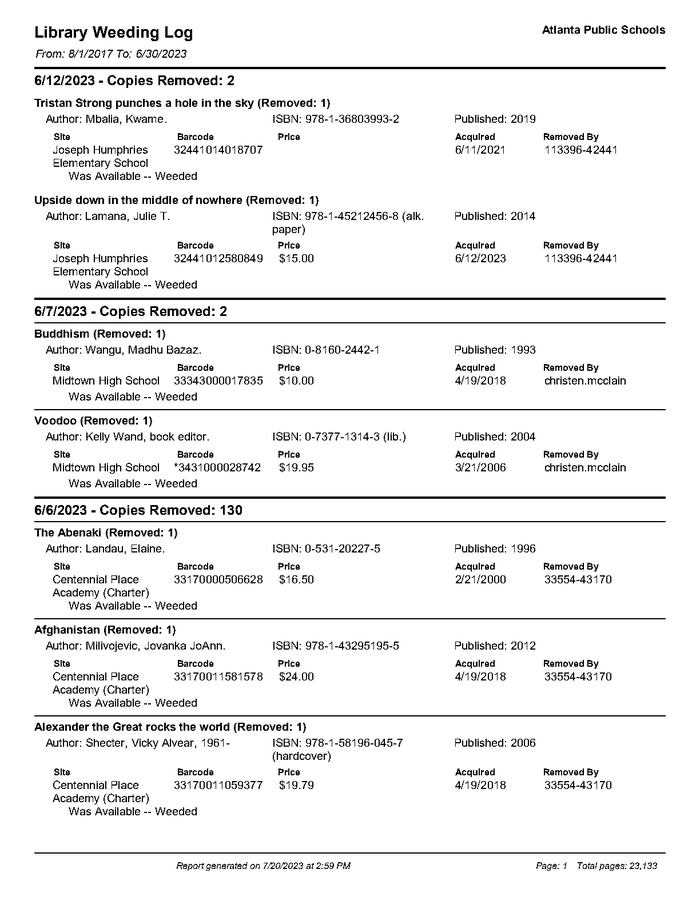

In [69]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/Atlanta_Public_Schools_GA_sample.pdf")
page = pdf.pages[0]
page.to_image(width=700)

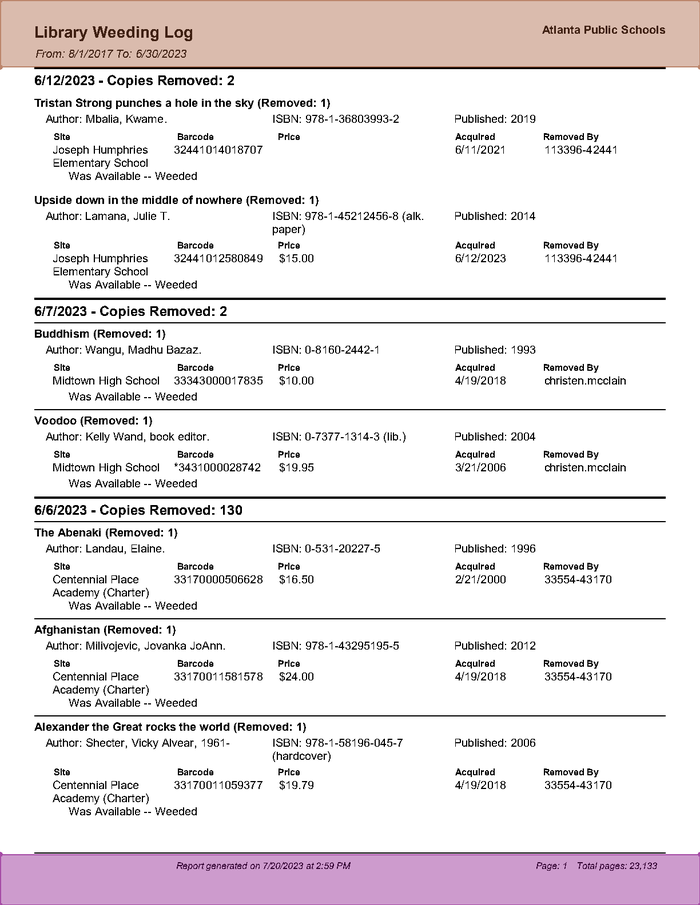

In [70]:
page.clear_highlights()
page.find('line[width=2]').above().highlight()
page.find_all('line')[-1].below().highlight()
page.to_image(width=700)

In [71]:
# Works on ALL pages
pdf.add_exclusion(lambda page: page.find('line[width=2]').above())
pdf.add_exclusion(lambda page: page.find_all('line')[-1].below())

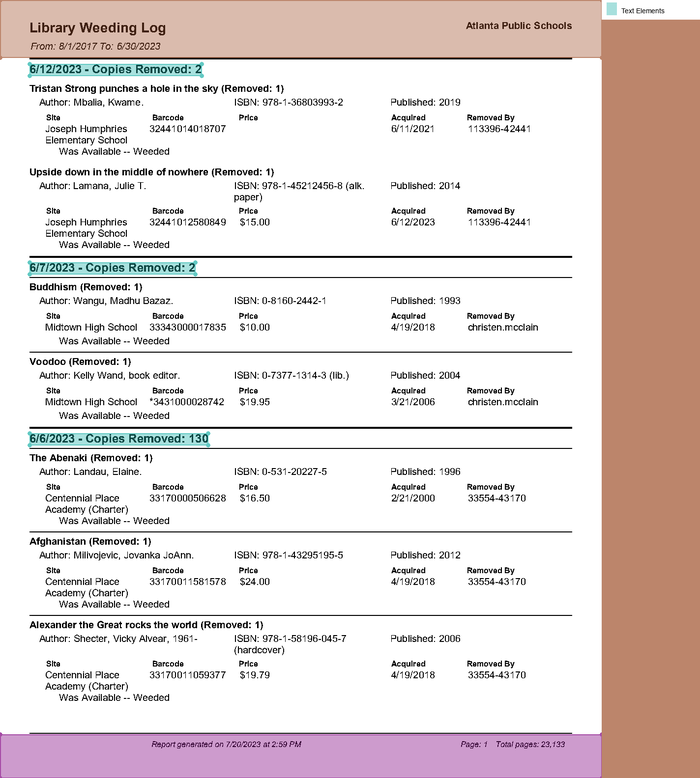

In [72]:
page.find_all('text:contains("Copies Removed")').highlight()
page.to_image(width=700)

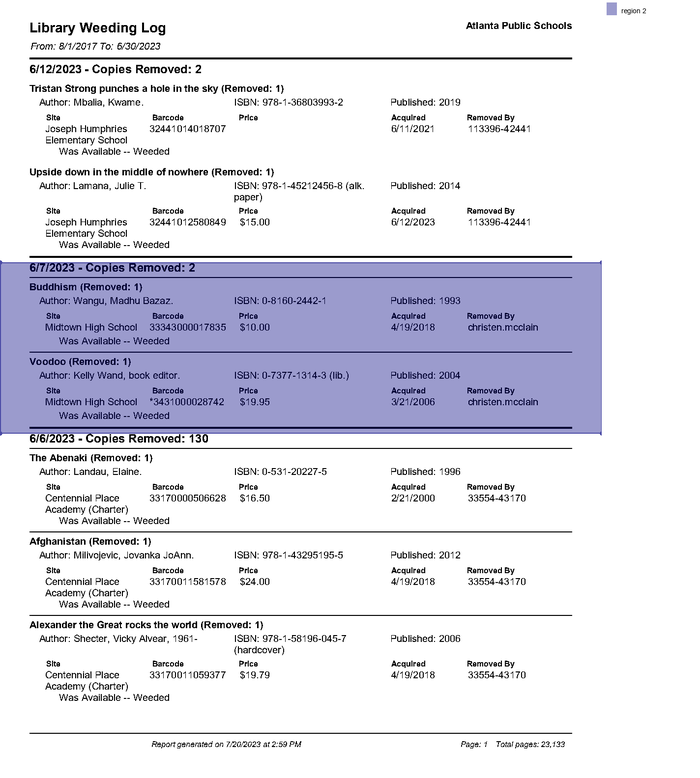

In [74]:
sections = page.get_sections(start_elements='text:contains("Copies Removed")', include_boundaries='start')

page.clear_highlights()
# sections[0].highlight(label='region 1')
sections[1].highlight(label='region 2')
# sections[2].highlight(label='region 3')
page.to_image(width=700)

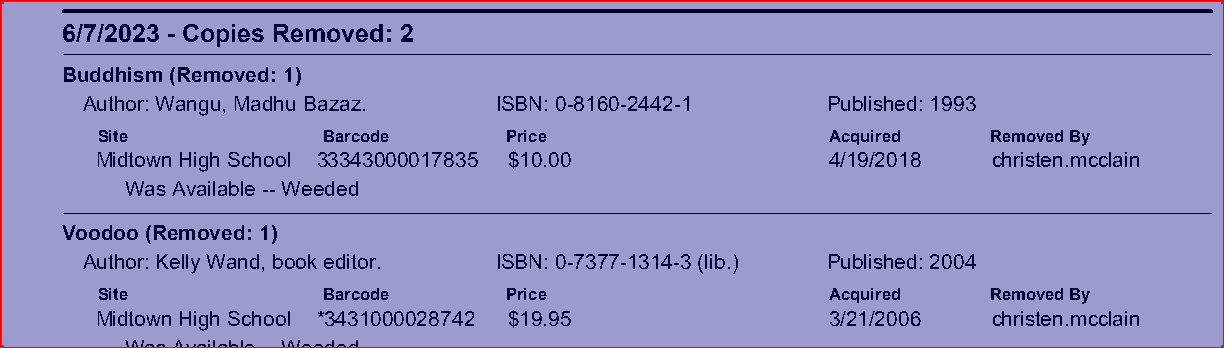

In [75]:
sections[1].to_image()

In [76]:
print(sections[2].extract_text())

6/6/2023 - Copies Removed: 130
The Abenaki (Removed: 1)
Author: Landau, Elaine. ISBN: 0-531-20227-5 Published: 1996
Site Barcode Price Acquired Removed By
Centennial Place 33170000506628 $16.50 2/21/2000 33554-43170
Academy (Charter)
Was Available -- Weeded
Afghanistan (Removed: 1)
Author: Milivojevic, Jovanka JoAnn. ISBN: 978-1-43295195-5 Published: 2012
Site Barcode Price Acquired Removed By
Centennial Place 33170011581578 $24.00 4/19/2018 33554-43170
Academy (Charter)
Was Available -- Weeded
Alexander the Great rocks the world (Removed: 1)
Author: Shecter, Vicky Alvear, 1961- ISBN: 978-1-58196-045-7 Published: 2006
(hardcover)
Site Barcode Price Acquired Removed By
Centennial Place 33170011059377 $19.79 4/19/2018 33554-43170
Academy (Charter)
Was Available -- Weeded


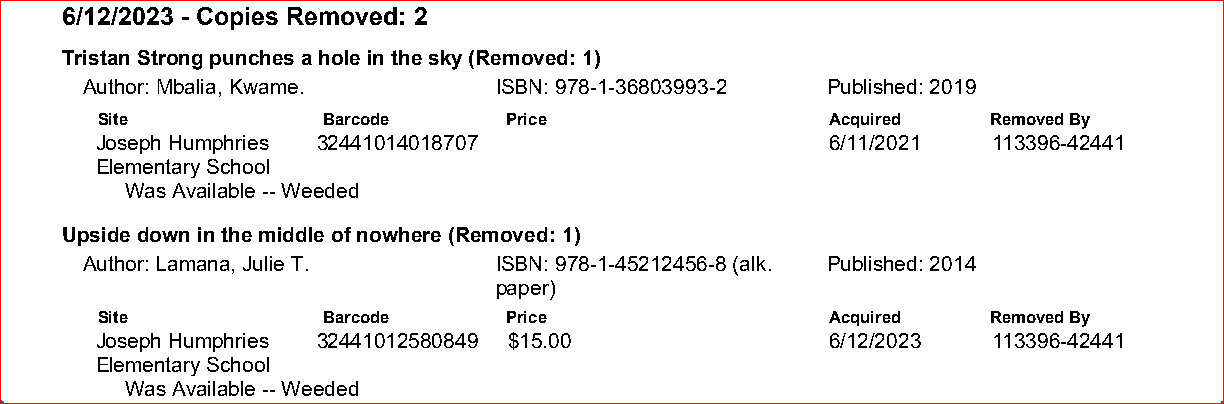

In [77]:
sections[0].to_image()

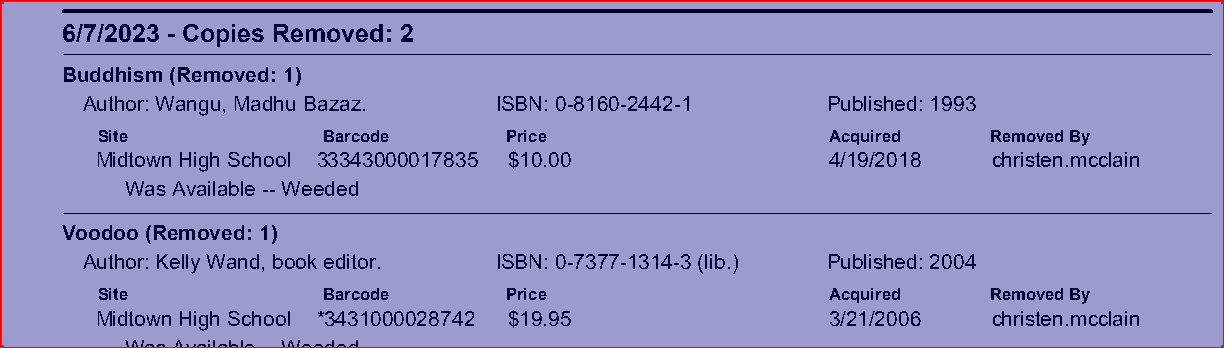

In [78]:
sections[1].to_image()

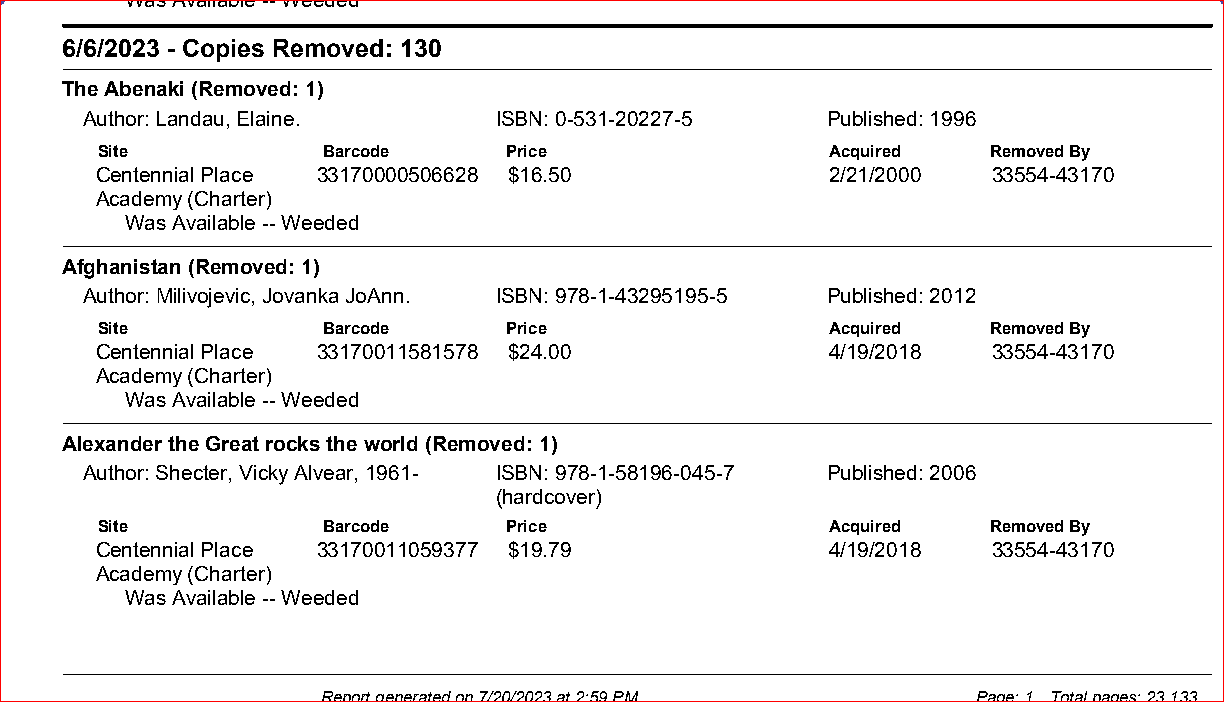

In [80]:
sections[2].to_image()

---
The Abenaki (Removed: 1)
$16.50
---
Afghanistan (Removed: 1)
$24.00
---
Alexander the Great rocks the world (Removed: 1)
$19.79


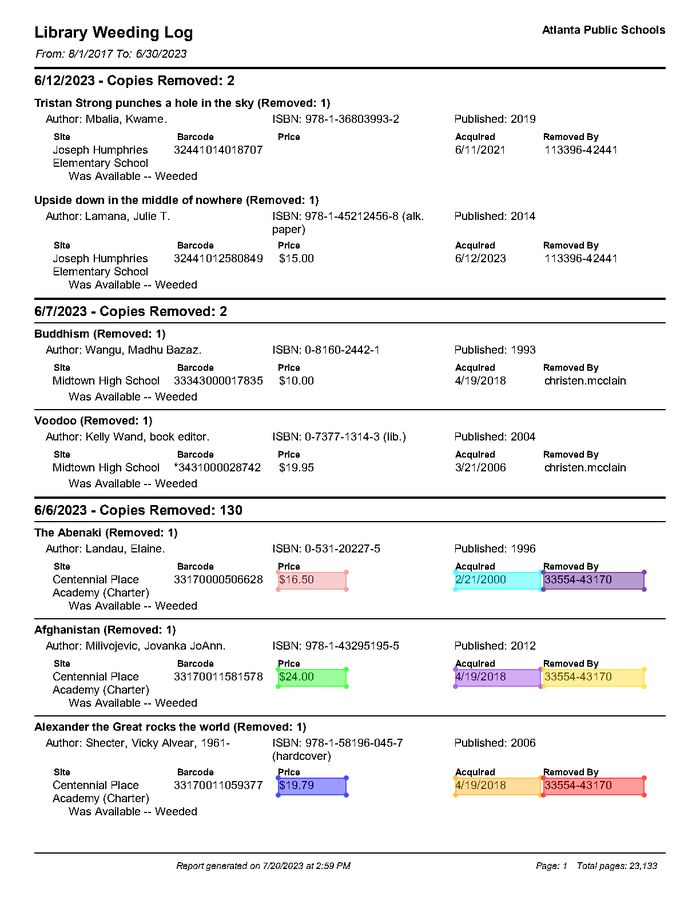

In [81]:
page.clear_highlights()
books = sections[2].get_sections('text[font_variant=AAAAAB][size=10]', include_boundaries='start')
for book in books:
    print("---")
    print(book.find('text[font_variant=AAAAAB][size=10]').extract_text())
    price = book.find('text:contains("Price")').below(height=16, width='element').expand(right=40).highlight()
    acquired = book.find('text:contains("Acquired")').below(height=16, width='element').expand(right=40).highlight()
    removed = book.find('text:contains("Removed By")').below(height=16, width='element').expand(right=40).highlight()
    print(price.extract_text())
page.to_image(width=700)

In [83]:
page.clear_highlights()
books = sections[2].get_sections('text[font_variant=AAAAAB][size=10]', include_boundaries='start')
for book in books:
    print("---")
    print(book.ask("What is the author?")['answer'])
    print(book.ask("What is the price?")['answer'])
    print(book.ask("When was it acquired?")['answer'])
    print(book.ask("Who was it removed by")['answer'])

---
Author: Landau, Elaine.
$16.50
2/21/2000
33554-43170
---
Author: Milivojevic, Jovanka JoAnn.
$24.00
4/19/2018
33554-43170
---
Author: Shecter, Vicky Alvear, 1961-
$19.79
4/19/2018
33554-43170
